<a href="https://colab.research.google.com/github/jdpatel1307/Projects/blob/main/uber_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'/content/gdrive/MyDrive/Projects/Uber/datasets/dataset_1.csv')
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11


In [ ]:
df['Date'].unique()

array(['10-Sep-12', nan, '11-Sep-12', '12-Sep-12', '13-Sep-12',
       '14-Sep-12', '15-Sep-12', '16-Sep-12', '17-Sep-12', '18-Sep-12',
       '19-Sep-12', '20-Sep-12', '21-Sep-12', '22-Sep-12', '23-Sep-12',
       '24-Sep-12'], dtype=object)

In [ ]:
df.select_dtypes('number').isna().sum()

Time (Local)        0
Eyeballs            0
Zeroes              0
Completed Trips     0
Requests            0
Unique Drivers      0
dtype: int64

In [ ]:
df.fillna(method='ffill', inplace=True)
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,2012-09-10,7,5,0,2,2,9
1,2012-09-10,8,6,0,2,2,14
2,2012-09-10,9,8,3,0,0,14
3,2012-09-10,10,9,2,0,1,14
4,2012-09-10,11,11,1,4,4,11


In [ ]:
# 1. Which date had the most completed trips during the two week period?
df.groupby('Date')['Completed Trips '].sum().reset_index().nlargest(1, 'Completed Trips ')

,Date,Completed Trips
12,2012-09-22,248


In [ ]:
# 2. What was the highest number of completed trips within a 24 hour period?
df.groupby('Date')['Completed Trips '].max().reset_index().nlargest(1, 'Completed Trips ')

,Date,Completed Trips
11,2012-09-21,36


In [ ]:
# 3. Which hour of the day had the most requests during the two week period?
df.groupby('Time (Local)')['Requests '].sum().reset_index().nlargest(1, 'Requests ')

,Time (Local),Requests
23,23,184


In [ ]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')

In [ ]:
# 4. What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)?
# Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)



### 5. What is the weighted average ratio of completed trips per driver during the two week period?

In [ ]:
inte = df.groupby('Time (Local)').agg({'Completed Trips ':'sum', 'Requests ' : 'sum',
                                       'Unique Drivers' : 'sum'})

inte.rename(columns={'Unique Drivers':'No_drivers'}, inplace=True)

inte['comp_per_driver'] = inte['Completed Trips '] / inte['No_drivers']

inte['Requests '] = inte['Requests '] / inte['Requests '].sum()

inte['weighted_avg'] = inte['comp_per_driver'] * inte['Requests ']

inte

,Completed Trips,Requests,No_drivers,comp_per_driver,weighted_avg
Time (Local),,,,,
0,102,0.076426,111,0.918919,0.070230
1,71,0.051668,94,0.755319,0.039026
2,61,0.053821,62,0.983871,0.052953
3,21,0.018837,40,0.525000,0.009890
4,2,0.004844,9,0.222222,0.001076
5,4,0.007535,11,0.363636,0.002740
6,19,0.015070,37,0.513514,0.007739
7,19,0.011841,60,0.316667,0.003750
8,24,0.015608,95,0.252632,0.003943


### 6. In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

In [ ]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,2012-09-10,7,5,0,2,2,9
1,2012-09-10,8,6,0,2,2,14
2,2012-09-10,9,8,3,0,0,14
3,2012-09-10,10,9,2,0,1,14
4,2012-09-10,11,11,1,4,4,11


In [ ]:
hourly = df.groupby('Time (Local)')['Requests '].sum()
hourly.rolling(8).sum()

Time (Local)
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7      446.0
8      333.0
9      263.0
10     191.0
11     203.0
12     247.0
13     288.0
14     331.0
15     380.0
16     433.0
17     505.0
18     596.0
19     705.0
20     759.0
21     816.0
22     919.0
23    1032.0
Name: Requests , dtype: float64

### 7.  Driver supply always increases when demand increases during the two week period.

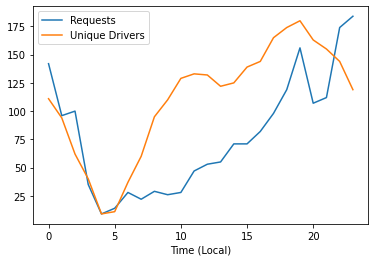

In [ ]:
import matplotlib.pyplot as plt

df.groupby('Time (Local)')['Requests '].sum().plot()
df.groupby('Time (Local)')['Unique Drivers'].sum().plot()
plt.legend();